<a href="https://colab.research.google.com/github/deborastuck/Criptomoedas/blob/main/Criptomoedas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
pip install dash

     |████████████████████████████████| 81kB 4.0MB/s 
     |████████████████████████████████| 1.0MB 9.7MB/s 
     |████████████████████████████████| 3.5MB 19.3MB/s 
     |████████████████████████████████| 92kB 9.7MB/s 
     |████████████████████████████████| 1.8MB 38.2MB/s 
     |████████████████████████████████| 358kB 36.0MB/s 
  Created wheel for dash: filename=dash-1.20.0-cp37-none-any.whl size=85845 sha256=af17a51b887d0acb6d56f4b9d5e71f469b38319058af5eb193879a778c4f1fbb
  Stored in directory: /root/.cache/pip/wheels/e6/33/41/ce361d0d1da277d2350f815b10f2ab1e331592d93ef2b07e29
  Created wheel for dash-renderer: filename=dash_renderer-1.9.1-cp37-none-any.whl size=1014873 sha256=4158c528f0f689e8300f6e85fe12677d3ffa8279bbf16fd214e4dadca7baf8a4
  Stored in directory: /root/.cache/pip/wheels/03/a9/c5/dd5815c601b0ede164c223ffd7bafebde716ca57de06ef8aec
  Created wheel for dash-core-components: filename=dash_core_components-1.16.0-cp37-none-any.whl size=3540992 sha256=6af91c3b7614f44f6e8a272

In [4]:
import pandas as pd
import plotly.offline as py
import plotly.graph_objs as go
import plotly.express as px
import seaborn as sn
import matplotlib.pyplot as plt
from datetime import date

# from chart_studio import plotly
# import chart_studio.dashboard_objs as dashboard
# import IPython.display
# from IPython.display import Image

import dash
import dash_core_components as dcc
import dash_html_components as html

In [5]:
# acessa csv de cada criptomoeda (são 5)
# e acrescenta a coluna Coin para identificar a criptomoeda
dfBtc = pd.read_csv('/content/drive/MyDrive/INF2424_Visualização de Dados/Trabalho INF2424_Visualização de Dados/Kaggle_criptomoedas/BTC-USD.csv')
dfBtc['Coin'] = "BTC"
dfBtc = dfBtc.sort_values(by='Date')


dfEth = pd.read_csv('/content/drive/MyDrive/INF2424_Visualização de Dados/Trabalho INF2424_Visualização de Dados/Kaggle_criptomoedas/ETH-USD.csv')
dfEth['Coin'] = "ETH"
dfEth = dfEth.sort_values(by='Date')

dfLtc = pd.read_csv('/content/drive/MyDrive/INF2424_Visualização de Dados/Trabalho INF2424_Visualização de Dados/Kaggle_criptomoedas/LTC-USD.csv')
dfLtc['Coin'] = "LTC"
dfLtc = dfLtc.sort_values(by='Date')

# dfUsdt = pd.read_csv('/content/drive/MyDrive/INF2424_Visualização de Dados/Trabalho INF2424_Visualização de Dados/Kaggle_criptomoedas/USDT-USD.csv')
# dfUsdt['Coin'] = "USDT"

dfXrp = pd.read_csv('/content/drive/MyDrive/INF2424_Visualização de Dados/Trabalho INF2424_Visualização de Dados/Kaggle_criptomoedas/XRP-USD.csv')
dfXrp['Coin'] = "XRP"
dfXrp = dfXrp.sort_values(by='Date')

# dfBV = pd.read_csv('/content/drive/MyDrive/INF2424_Visualização de Dados/Trabalho INF2424_Visualização de Dados/Kaggle_bolsaValores/DowJonesIndustrialAverageHistoricalData.csv')
# dfBV['Coin'] = "BV"

# une os dataframes de cada criptomoeda em um único dataframe
df = pd.concat([dfBtc, dfEth, dfLtc, dfXrp])

# acrescenta coluna dia da semana (0 = segunda, 1 = terça, 2 = quarta, 3 = quinta, 4 = sexta, 5 = sábado, 6 = domingo)
date_dateTime = pd.to_datetime(df['Date'])
df['Weekday'] = date_dateTime.dt.dayofweek

# são 9135 linhas
df.count()
# dfTeste = df[df['Coin'].str.contains('BV')] 
# dfTeste.head()

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Coin,Weekday
0,2016-01-01,430.721008,436.246002,427.515015,434.334015,434.334015,36278900.0,BTC,4
1,2016-01-02,434.622009,436.062012,431.869995,433.437988,433.437988,30096600.0,BTC,5
2,2016-01-03,433.578003,433.743011,424.705994,430.010986,430.010986,39633800.0,BTC,6
3,2016-01-04,430.061005,434.516998,429.084015,433.091003,433.091003,38477500.0,BTC,0
4,2016-01-05,433.069000,434.182007,429.675995,431.959991,431.959991,34522600.0,BTC,1


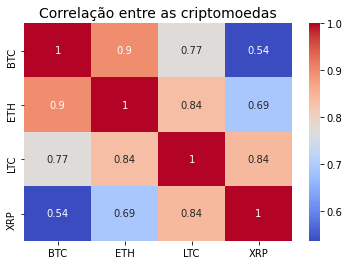

In [6]:
# Heatmap: mostra a correlação entre as criptomoedas pela coluna de fechamento
data={'BTC':dfBtc['Close'],'ETH':dfEth['Close'], 'LTC':dfLtc['Close'], 'XRP':dfXrp['Close']}

dfClose = pd.DataFrame(data)

corrMatrix = dfClose.corr()
corrMatrix = dfClose.corr()
sn.heatmap(corrMatrix, annot=True, cmap= 'coolwarm')
plt.title('Correlação entre as criptomoedas', fontsize = 14)
plt.show()

In [7]:
# dfb2020 = dfBtc[dfBtc['Date'].str.contains('2020-01')] 
# dfe2020 = dfEth[dfEth['Date'].str.contains('2020-01')] 
# plt.plot(dfb2020['Date'], dfb2020['Close'],'g--', dfe2020['Date'], dfe2020['Close'], 'bs')
dfBtc['ClosePct'] = dfBtc['Close'].pct_change()*100
dfEth['ClosePct'] = dfEth['Close'].pct_change()*100
dfLtc['ClosePct'] = dfLtc['Close'].pct_change()*100
dfXrp['ClosePct'] = dfXrp['Close'].pct_change()*100
dfBtc2021 = dfBtc[dfBtc['Date'].str.contains('2021')] 
dfEth2021 = dfEth[dfEth['Date'].str.contains('2021')]
dfLtc2021 = dfLtc[dfLtc['Date'].str.contains('2021')]
dfXrp2021 = dfXrp[dfXrp['Date'].str.contains('2021')]



# plt.show()
# df = df.sort_values(by='Date')

fig = go.Figure()


fig.add_trace(go.Scatter(x=dfBtc2021['Date'], y=dfBtc2021['ClosePct'],
                    mode='lines+markers',
                    marker_color='rgb(128,128,128)',
                    name='BTC'))

fig.add_trace(go.Scatter(x=dfEth2021['Date'], y=dfEth2021['ClosePct'],
                    mode='lines+markers',
                    marker_color='rgb(128,128,128)',
                    name='ETH'))

fig.add_trace(go.Scatter(x=dfLtc2021['Date'], y=dfLtc2021['ClosePct'],
                    mode='lines+markers',
                    marker_color='rgb(128,128,128)',
                    name='LTC'))

fig.add_trace(go.Scatter(x=dfXrp2021['Date'], y=dfXrp2021['ClosePct'],
                    mode='lines+markers',
                    marker_color='rgb(128,128,128)',
                    name='XRP'))



fig.update_layout(
    title_text="Criptomoedas (% variação)",
    font=dict(
        size=18
    )
)

fig.update_xaxes(title_text="Data")

fig.update_yaxes(title_text="<b>Variação (%)</b> valor de fechamento")

# fig = px.line(df,
#               x="Date",
#               y="ClosePct", 
#               color="Coin", 
#               line_group="Coin",
              
#               )

# fig.update_traces(patch={"line":{"color":"blue", "width":5}}, 
#                   selector={"Coin":"BTC"})

# fig.update_traces(patch={"line":{"color":"red", "width":5}}, 
#                   selector={"Coin":"ETH"})

# fig.update_traces(patch={"line":{"color":"green", "width":5}}, 
#                   selector={"Coin":"LTC"})

# fig.update_traces(patch={"line":{"color":"yellow", "width":5}}, 
#                   selector={"Coin":"XRP"})

# fig.update_layout(title="Correlação entre valores de fechamento das criptomoedas",
#                 showlegend=True,

#                 yaxis={"visible":True},
#                 xaxis_title="Data",
#                 yaxis_title="Variação (%) Fechamento"                                
#                 )
fig.show()

In [8]:
dfBtc.index = dfBtc['Coin']
dfEth.index = dfEth['Coin']
dfLtc.index = dfLtc['Coin']
# dfUsdt.index = dfUsdt['Coin']
dfXrp.index = dfXrp['Coin']


In [9]:
# Candlestick: laranja para baixa (fechamento abaixo da abertura) e azul para alta (fechamento acima da abertura). 
# Comprimento maior indica que houve muita movimentação do valor no mesmo período (dia).
# Topo do corpo representa a abertura, base do corpo representa fechamento.
# Topo do pavio representa valor máximo, base do pavio representa valor mínimo.
# Esse gráfico traz mais informações (das movimentações) do que os gráficos de linhas.

# Moeda: BTC em janeiro de 2020
df2020 = dfBtc[dfBtc['Date'].str.contains('2020-01')] 

fig = go.Figure(data=[go.Candlestick(x=df2020['Date'],
                open=df2020['Open'], high=df2020['High'],
                low=df2020['Low'], close=df2020['Close'],
                increasing_line_color = 'blue', decreasing_line_color = 'orange'
                    )])

#fig.update_layout(xaxis_rangeslider_visible=False)  
fig.show()


In [10]:
# Moeda: BTC 2016 a 2020
fig = go.Figure(data=[go.Candlestick(x=dfBtc['Date'],
                open=dfBtc['Open'], high=dfBtc['High'],
                low=dfBtc['Low'], close=dfBtc['Close'],
                increasing_line_color = 'blue', decreasing_line_color = 'orange'
                    )])

#fig.update_layout(xaxis_rangeslider_visible=False)  
fig.show()

In [11]:
!pip install jupyter-dash

In [12]:
import plotly.express as px
from jupyter_dash import JupyterDash
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.graph_objects as go

import pandas as pd
from datetime import datetime

#importar twitters
dftwitters = pd.read_csv('/content/drive/MyDrive/INF2424_Visualização de Dados/Trabalho INF2424_Visualização de Dados/twitters.csv')

dfBtc = pd.read_csv('/content/drive/MyDrive/INF2424_Visualização de Dados/Trabalho INF2424_Visualização de Dados/Kaggle_criptomoedas/BTC-USD.csv')
dfBtc['Coin'] = "BTC"

dfEth = pd.read_csv('/content/drive/MyDrive/INF2424_Visualização de Dados/Trabalho INF2424_Visualização de Dados/Kaggle_criptomoedas/ETH-USD.csv')
dfEth['Coin'] = "ETH"

dfLtc = pd.read_csv('/content/drive/MyDrive/INF2424_Visualização de Dados/Trabalho INF2424_Visualização de Dados/Kaggle_criptomoedas/LTC-USD.csv')
dfLtc['Coin'] = "LTC"

dfUsdt = pd.read_csv('/content/drive/MyDrive/INF2424_Visualização de Dados/Trabalho INF2424_Visualização de Dados/Kaggle_criptomoedas/USDT-USD.csv')
dfUsdt['Coin'] = "USDT"

dfXrp = pd.read_csv('/content/drive/MyDrive/INF2424_Visualização de Dados/Trabalho INF2424_Visualização de Dados/Kaggle_criptomoedas/XRP-USD.csv')
dfXrp['Coin'] = "XRP"

dfBV = pd.read_csv('/content/drive/MyDrive/INF2424_Visualização de Dados/Trabalho INF2424_Visualização de Dados/Kaggle_bolsaValores/DowJonesIndustrialAverageHistoricalData.csv')
dfBV['Price'] = dfBV['Price'].str.replace(',', '')
dfBV['Open'] = dfBV['Open'].str.replace(',', '')
dfBV['High'] = dfBV['High'].str.replace(',', '')
dfBV['Low'] = dfBV['Low'].str.replace(',', '')
dfBV['Coin'] = "Bolsa Valores"

dfBV20 =  pd.read_csv('/content/drive/MyDrive/INF2424_Visualização de Dados/Trabalho INF2424_Visualização de Dados/Kaggle_bolsaValores/dowjonesindustrialavg2020.csv', sep=';')

dfBV20['Close'] = dfBV20['Close'].str.replace(',', '')
dfBV20['Price'] = dfBV20['Close']
del dfBV20['Close']
dfBV20['Open'] = dfBV20['Open'].str.replace(',', '')
dfBV20['High'] = dfBV20['High'].str.replace(',', '')
dfBV20['Low'] = dfBV20['Low'].str.replace(',', '')
dfBV20['Coin'] = "Bolsa Valores"

# une os dataframes de cada criptomoeda em um único dataframe
df = pd.concat([dfBtc, dfEth, dfLtc, dfUsdt, dfXrp, dfBV, dfBV20])

# acrescenta coluna dia da semana (0 = segunda, 1 = terça, 2 = quarta, 3 = quinta, 4 = sexta, 5 = sábado, 6 = domingo)
date_dateTime = pd.to_datetime(df['Date'])
df['Weekday'] = date_dateTime.dt.dayofweek



app = JupyterDash(__name__)

app.layout = html.Div([
    html.H1(("Análise de Criptomoedas"), style={'text-align': 'center', 'font-family': 'Arial, Helvetica, sans-serif'}),
    html.Div([
        html.Div([html.Label(["Criptomoeda"], style={'color': 'grey', 'font-weight': 'bold', 'font-family': 'Arial, Helvetica, sans-serif'}),
           dcc.Dropdown(
                id="coin-filter",
                options=[
                    {"label": Coin, "value": Coin}
                    for Coin in (df.Coin.unique())
                ],
                value="BTC",
                clearable=False,
                style={'width': '150px', 'margin-right':'10px'}
            ), 
        ]),
        html.Div([html.Label(["Ano"], style={'color': 'grey', 'font-weight': 'bold', 'font-family': 'Arial, Helvetica, sans-serif'}),
            dcc.Dropdown(
                id="year-filter",
                options=[
                    {"label": Date, "value": Date}
                    for Date in ['Todos os anos','2021', '2020', '2019', '2018', '2017', '2016']
                ],
                value="Todos os anos",
                clearable=False,
                style={'width': '150px', 'margin-right':'10px'},
            ), 
        ]),
        html.Div([html.Label(["Mês"], style={'color': 'grey', 'font-weight': 'bold', 'font-family': 'Arial, Helvetica, sans-serif'}),
            dcc.Dropdown(
                id="month-filter",
                options=[
                    {"label": Month, "value": Month}
                    for Month in ['Todos os meses', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
                ],
                value="01",
                clearable=False,
                style={'width': '150px'},
            ), 
        ]),
    ],style={'display':'flex'}),
    html.Div(dcc.Graph(id="graph")),
])

@app.callback(
    Output("graph", "figure"), 
    [Input("coin-filter", "value"),
     Input("year-filter", "value"),
     Input("month-filter", "value"),])

def display_candlestick(Coin, Date, Month):
    if(Date != 'Todos os anos' and Month != 'Todos os meses'):
        mask = (
            (df.Coin == Coin)
             & (df.Date.str.contains(str(Date)+'-'+str(Month)))
        )
    elif(Date != 'Todos os anos' and Month == 'Todos os meses'):
        mask = (
          (df.Coin == Coin)
          & (df.Date.str.startswith(str(Date)))
        )
    elif(Date == 'Todos os anos' and Month != 'Todos os meses'):
        mask = (
          (df.Coin == Coin)
          &  (df.Date.str.contains('-'+str(Month)+'-'))
        )
    else:
        mask = (
          (df.Coin == Coin)
          # & (df.Date.str.contains('-'+str(Month)+'-'))
        )
    filtered_data = df.loc[mask, :]
    fig = go.Figure()
    fig.add_trace(go.Candlestick(
        x=filtered_data['Date'],
        open=filtered_data['Open'],
        high=filtered_data['High'],
        low=filtered_data['Low'],
        close=filtered_data['Close'],
        increasing_line_color = 'blue', decreasing_line_color = 'orange',
        ))

    # fig.add_trace(go.Scatter(
    #       x=['2021-3-24', '2021-6-12', '2021-5-24', '2021-5-12', '2021-5-7', '2021-4-14'],
    #       # x=filtered_data['Date'],
    #       y=[2],
    #       mode="markers+text",
    #       name="Markers and Text",
    #       text=dftwitters['Mensagem'],
    #       textposition="bottom center"
    #     )
    # )
    
    # fig.update_layout(plot_bgcolor="white", 
    #                   xaxis= {
    #                     "tickcolor": "#E5E7E9",
    #                     "tickwidth": 50,
      
    #                     "gridcolor": "#E5E7E9",
    #                     "gridwidth": 2,      
    #                   },
    #                   yaxis= {
    #                     "tickcolor": "#E5E7E9",
    #                     "tickwidth": 50,
      
    #                     "gridcolor": "#E5E7E9",
    #                     "gridwidth": 2,      
    #                   }
    #                   )
     
    return fig

app.run_server(mode='inline')

<IPython.core.display.Javascript object>